# ASSIGNMENT 4 : DATA CLEANING 
### NAME: Palak Nath 
### PRN: 17070124048

## <span style='color:Orange'> Dataset Taken: TITANIC DATASET </span>

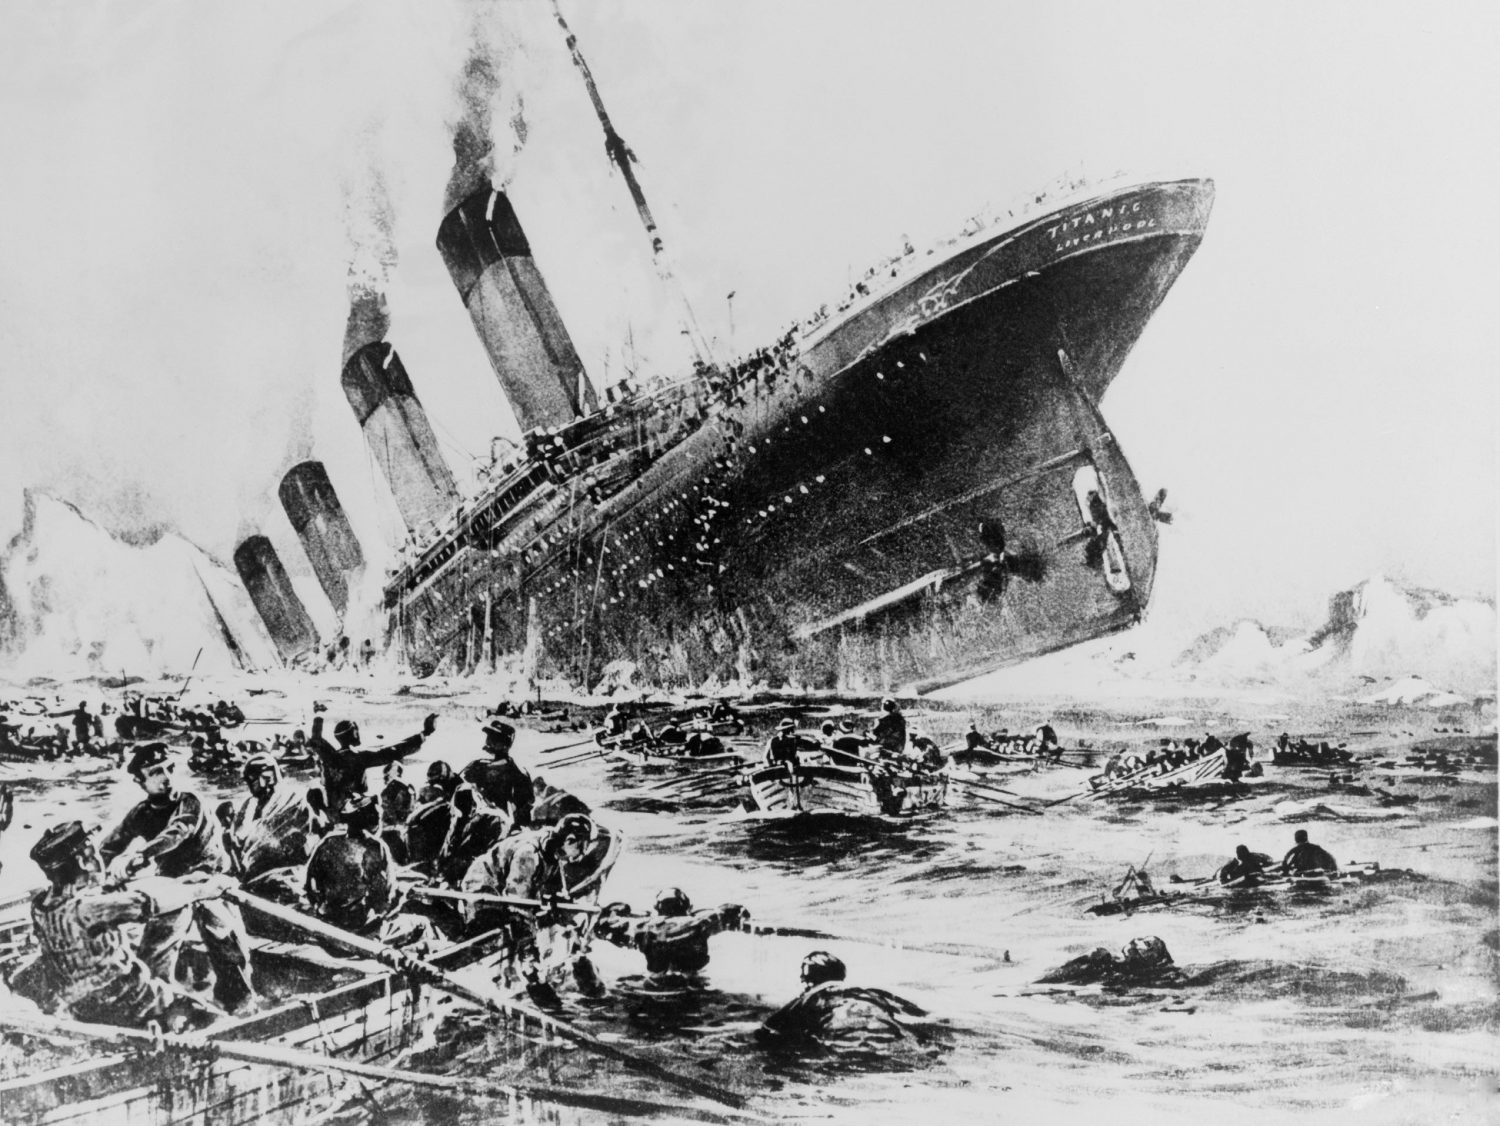

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import rcParams
from collections import Counter
%matplotlib inline

### LOADING THE DATASET 

In [2]:
A = pd.read_csv("train.csv")

#### Variable Description
 - PassengerId : unique id number to each passenger
 - Survived : passenger survive(1) or died(0)
 - Pclass : passenger class
 - Name : name of passenger
 - Sex : gender of passenger
 - Age : age of passenger
 - SibSp : number of siblings/spouses
 - Parch : number of parents/children
 - Ticket : ticket number
 - Fare : amount of money spent on ticket
 - Cabin : cabin category
 - Embarked : port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
A.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Gives rows and columns

In [4]:
A.shape 

(891, 12)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
A.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### DATA VISUALIZATION

<AxesSubplot:xlabel='Survived', ylabel='count'>

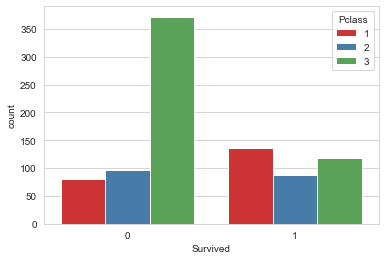

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=A,palette='Set1')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

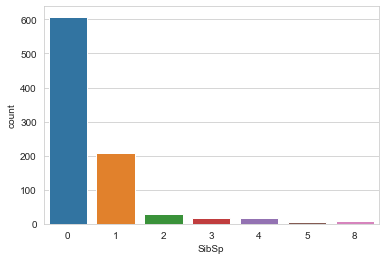

In [8]:
sns.countplot(x='SibSp',data=A)

<AxesSubplot:>

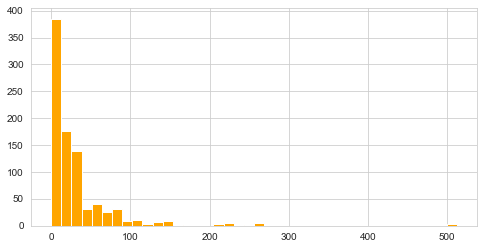

In [9]:
A['Fare'].hist(color='orange',bins=40,figsize=(8,4))

C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


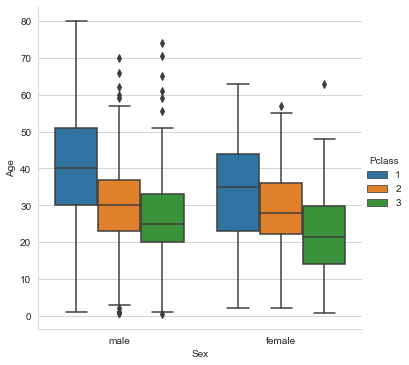

In [10]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = A, kind = "box")
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

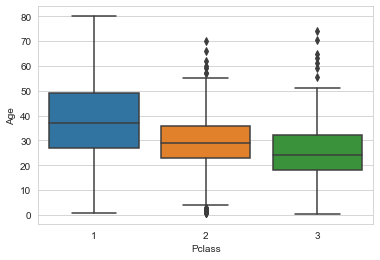

In [11]:
sns.boxplot(x='Pclass',y='Age',data=A)

C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


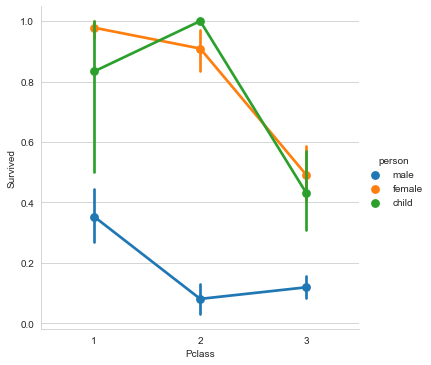

In [12]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
    
A['person'] = A[['Age','Sex']].apply(titanic_children,axis=1)
sns.factorplot('Pclass','Survived',data=A,hue='person')

No handles with labels found to put in legend.


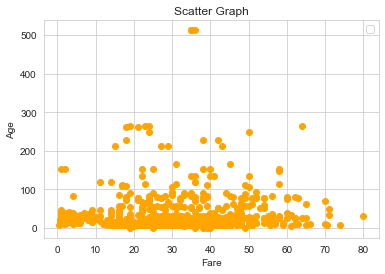

In [13]:
x=A['Fare']
y=A['Age']
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Scatter Graph")
plt.scatter(y,x,c="orange")
plt.legend()
plt.show()

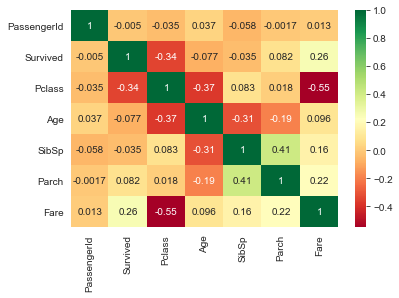

In [14]:
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
titanic_corr(A)

### ANALYSING THE DATA 

#### How many NA in my data 

In [15]:
A.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
dtype: int64

#### Heat Map of showing which columns have Null Values

<AxesSubplot:>

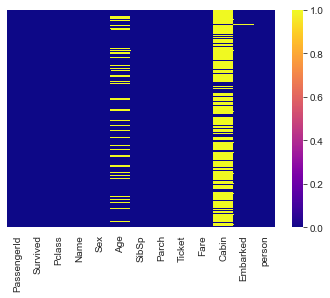

In [16]:
sns.heatmap(A.isnull(),yticklabels=False,cmap='plasma')

# Handling Missing Data 
 - Impute the values 
  - Filling values with zero 
  - Filling in mean values
 - Drop the values

#### Drop all records that have one or more missing values

In [17]:
missing_dropped =  A.dropna()

In [18]:
missing_dropped.shape

(183, 13)

<span style='background :yellow' > EXPLAINATION WHY THIS METHOD WON'T WORK:</span> <span style='color:red'> This does not work for this dataset as it would leave us with just 183 rows, because all the rows with empty values for cabin and age are removed, which wouln't be sufficient for the further model creation </span>

#### Drop only those rows that have all records missing

In [19]:
missing_dropped_row = A.dropna(how="all")

In [20]:
missing_dropped_row.shape

(891, 13)

In [21]:
missing_dropped_row.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [22]:
missing_dropped_row.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
person         891
dtype: int64

<span style='background :yellow' > EXPLAINATION WHY THIS WAS DONE:</span> <span style='color:red'> This was done in order to remove any empty row, incase any  </span>

## IMPUTATION

#### 1. Filling missing data with zeros

In [23]:
filled_zeros = A.fillna(0)
filled_zeros.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
person         891
dtype: int64

In [24]:
filled_zeros.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,male


<span style='background :yellow' > EXPLAINATION WHY THIS METHOD WON'T WORK:</span> <span style='color:red'> This does not work for this dataset as we can't impute 0 for all the missing age and cabin values as it won't be fare for the model building </span>

## CREATING A ACOPY
### Two types of copies
import copy
- copy.copy(x) : Shallow
- copy.deepcopy(x) : Deep


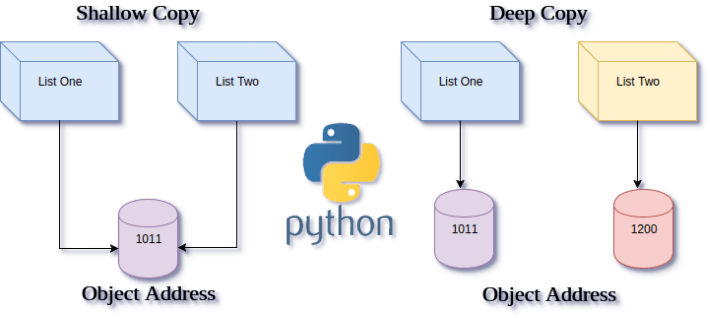

####  2. Fill in missing data with the mean of the values from the other row = A.copy

In [25]:
import copy
Ac = A.copy()   #shallow copy 
Bc= copy.deepcopy(A)  #deep copy to be used during outlier detection

In [26]:
Ac.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


#### Replacing Blank values in age column with the mean of the age as age column is an important column for model

In [27]:
Ac.Age.fillna(Ac.Age.mean, inplace = True)

In [28]:
Ac.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
dtype: int64

<AxesSubplot:>

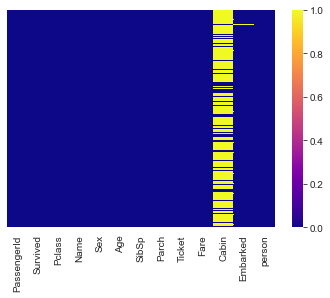

In [29]:
sns.heatmap(Ac.isnull(),yticklabels=False,cmap='plasma')

### DROPPING UNNECESSARY COLUMNS

#### Dropping the Cabin Column as it has very less data and is also not significant in determining the Survived or not Survived

In [30]:
A=Ac.dropna(subset=['Cabin','Embarked']).head()

In [31]:
A.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female


#### Heat Map after handling all the missing values

<AxesSubplot:>

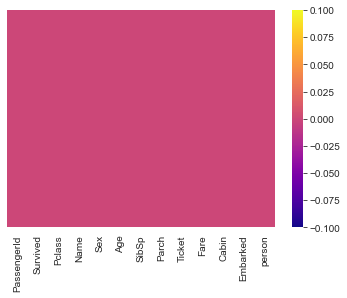

In [32]:
sns.heatmap(A.isnull(),yticklabels=False,cmap='plasma')

### OUTLIER DETECTION

In [33]:
# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(Bc,2,["Age","SibSp","Parch","Fare"])

C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [47]:
print("OUTLIERS IN THE DATA")
Bc.loc[Outliers_to_drop]

OUTLIERS IN THE DATA


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S,male
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,female
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,male
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,female
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,male
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,male
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S,female
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,female
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,male
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,female


## QUESTIONS REGARDING THE DATASET 

#### Q1. What was the average fare that the passengers paid for the titanic?

In [36]:
A.Fare.mean()

43.899159999999995

#### Q2. Which class had maximum people travelling in it?

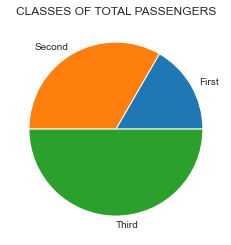

In [37]:
c=A['Pclass'].value_counts()
y = np.array([1,2,3])
mylabels = ["First","Second","Third"]
plt.pie(y,labels=mylabels)
plt.title('CLASSES OF TOTAL PASSENGERS')
plt.show()

It is shown from the pie chart above that the max people were in Third Class

#### Q3. What was the maximum number of siblings a passenger had?

In [38]:
A.SibSp.max()

1

#### Q4. How many people from Various classes Survived?

In [39]:
# Pclass - Survived
survived= A[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived",ascending = False)
survived["Survived"]= survived["Survived"].multiply(100)
survived

,Pclass,Survived
1,3,100.0
0,1,75.0


Table above shows the percentage of people from various classes that survivied the Titanic Disaster

#### Q5. How many people from the two genders Survived?

In [40]:
# Sex - Survived
sex_survived=A[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Sex",ascending = False)
sex_survived["Survived"]= sex_survived["Survived"].multiply(100)
sex_survived

,Sex,Survived
1,male,0
0,female,100


<AxesSubplot:xlabel='Survived', ylabel='count'>

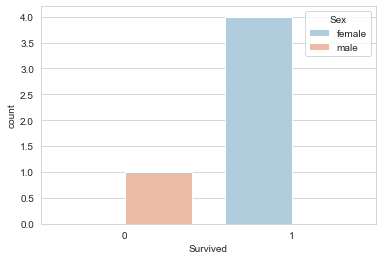

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=A,palette='RdBu_r')

#### Q6. What factors/columns of the data contributed in the survived rate ?

Factors like Age, Sex, Pclass played a key role in detereming the survival as Children, Women and First Class were given a priority in the rescue operation

### Converting Categorical Features into Numerical 

In [42]:
sex = pd.get_dummies(A['Sex'],drop_first=True)
embark = pd.get_dummies(A['Embarked'],drop_first=True)
A.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
A = pd.concat([A,sex,embark],axis=1)
A.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,person,male,S
1,2,1,1,38,1,0,71.2833,C85,female,0,0
3,4,1,1,35,1,0,53.1000,C123,female,0,1
6,7,0,1,54,0,0,51.8625,E46,male,1,1
10,11,1,3,4,1,1,16.7000,G6,child,0,1
11,12,1,1,58,0,0,26.5500,C103,female,0,1


In [43]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 11
Data columns (total 11 columns):
PassengerId    5 non-null int64
Survived       5 non-null int64
Pclass         5 non-null int64
Age            5 non-null object
SibSp          5 non-null int64
Parch          5 non-null int64
Fare           5 non-null float64
Cabin          5 non-null object
person         5 non-null object
male           5 non-null uint8
S              5 non-null uint8
dtypes: float64(1), int64(5), object(3), uint8(2)
memory usage: 570.0+ bytes


In [44]:
A.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,male,S
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,7.20000,0.800000,1.400000,0.600000,0.200000,43.899160,0.200000,0.800000
std,4.32435,0.447214,0.894427,0.547723,0.447214,22.015614,0.447214,0.447214
min,2.00000,0.000000,1.000000,0.000000,0.000000,16.700000,0.000000,0.000000
25%,4.00000,1.000000,1.000000,0.000000,0.000000,26.550000,0.000000,1.000000
50%,7.00000,1.000000,1.000000,1.000000,0.000000,51.862500,0.000000,1.000000
75%,11.00000,1.000000,1.000000,1.000000,0.000000,53.100000,0.000000,1.000000
max,12.00000,1.000000,3.000000,1.000000,1.000000,71.283300,1.000000,1.000000


### END OF ASSIGNMENT